<a href="https://colab.research.google.com/github/jade-mcalister/Weather-Data/blob/development/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1, Loss: 0.009087550849039425
Epoch 2, Loss: 0.007791862215028083
Epoch 3, Loss: 0.0077521277014015325
Epoch 4, Loss: 0.00822843901053201
Epoch 5, Loss: 0.00825209371027922
Epoch 6, Loss: 0.007711386203111388
Epoch 7, Loss: 0.007736723915427876
Epoch 8, Loss: 0.007969148924178491
Epoch 9, Loss: 0.00838408797312629
Epoch 10, Loss: 0.007759349877114878
Epoch 1, Loss: 0.008358917223480686
Epoch 2, Loss: 0.007805271019758788
Epoch 3, Loss: 0.007734387010830205
Epoch 4, Loss: 0.007724040436592486
Epoch 5, Loss: 0.007769863844599404
Epoch 6, Loss: 0.007708305349285634
Epoch 7, Loss: 0.007771714677647115
Epoch 8, Loss: 0.0077620858068449755
Epoch 9, Loss: 0.0077914593798604345
Epoch 10, Loss: 0.007708307630016911
Epoch 1, Loss: 0.010356625133532216
Epoch 2, Loss: 0.009052278609590611
Epoch 3, Loss: 0.008394683255167644
Epoch 4, Loss: 0.008068075646475752
Epoch 5, Loss: 0.007894303680385774
Epoch 6, Loss: 0.007802975967408152
Epoch 7, Loss: 0.007757311119714877
Epoch 8, Loss: 0.007737779

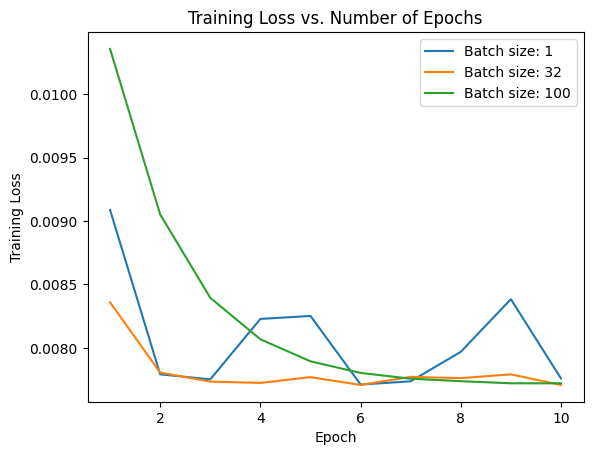

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def get_data(datafile):
    # Load data
    data = pd.read_csv(datafile)

    # Define feature and target variables
    X = data[['Humidity', 'Visibility (km)']].values
    y = data['Temperature (C)'].values

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    return X_train, X_test, y_train, y_test

# Create batch-wise data iterator for training
def data_iter(batch_size, X, y):
    # Define number of samples
    num_examples = len(X)

    # Create list of value indices
    indices = list(range(num_examples))

    # Shuffle indices
    np.random.shuffle(indices)

    # Iterate through data, incrementing by the size of the batch
    for i in range(0, num_examples, batch_size):
        batch_indices = indices[i:min(i + batch_size, num_examples)]
        yield X[batch_indices], y[batch_indices]

# Initialize batch size
batch_size = 32

# Create model parameters, initialized to random values
def create_model_parameter(mu, sigma, row, column): #
    weights = np.random.normal(mu, sigma, size=(row, column))
    bias = np.zeros(column)
    return weights, bias

# Implement normal equation y = aX + b
def model(X, weights, bias):
    return np.dot(X, weights) + bias

# Calculate squared loss
def squared_loss(y_hat, y):
    return ((y_hat - y.reshape(y_hat.shape)) ** 2) / 2

# Calculate gradient of the weights and bias using derivative of loss function
def gradient(X, y_hat, y):
    model_size = X.shape[0]
    y = y.reshape(-1, 1)  # Ensure y is a column vector
    dw = np.dot(X.T, (y_hat - y)) / model_size
    db = np.sum(y_hat - y) / model_size
    return dw, db

# Stochastic gradient descent to update model parameters
def sgd(weights, bias, dw, db, learning_rate):
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias

# Train model
def train(learning_rate, num_epochs, X, y):
    # Initialize parameters and empty loss array
    weights, bias = create_model_parameter(0, 0.01, X.shape[1], 1)
    losses = []

    # Traverse loop depending on number of epochs
    for epoch in range(num_epochs):
        # Iterate through each batch
        for X_batch, y_batch in data_iter(batch_size, X, y):
            # Predict target
            y_hat = model(X_batch, weights, bias)
            # Calculate loss
            loss = squared_loss(y_hat, y_batch)
            # Calculate gradient
            dw, db = gradient(X_batch, y_hat, y_batch)
            # Apply stochastic gradient descent
            weights, bias = sgd(weights, bias, dw, db, learning_rate)

        # Find the average loss for each epoch
        train_loss = np.mean(squared_loss(model(X, weights, bias), y))

        # Append loss to array
        losses.append(train_loss)

        # Print epoch number and average loss per epoch
        print(f'Epoch {epoch + 1}, Loss: {train_loss}')

    return weights, bias, losses

# Plot data and function
def draw_loss(all_losses, batch_sizes, epochs):
    # Iterate through loss array
    for i, losses in enumerate(all_losses):
        # Plot loss for each batch size
        plt.plot(range(1, epochs + 1), losses, label=f'Batch size: {batch_sizes[i]}')

    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.title('Training Loss vs. Number of Epochs')
    plt.legend()
    plt.show()

datafile = '/content/sample_data/weather_data.csv'
# Call get features method
X_train, X_test, y_train, y_test = get_data(datafile)

# Initialize batch size, learning rate, epochs
batch_sizes = [1, 32, 100]
learning_rate = 0.03
epochs = 10
all_losses = []

# Iterate over batch sizes
for batch_size in batch_sizes:
    # Train the model, ignoring weights and biases
    _, _, losses = train(learning_rate, epochs, X_train, y_train)
    # Append to loss array
    all_losses.append(losses)

# Plot loss
draw_loss(all_losses, batch_sizes, epochs)
